In [2]:
import numpy
import torchvision

train = torchvision.datasets.MNIST('mnist', train = True, download = False)
test = torchvision.datasets.MNIST('mnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) / 255 for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

test_images = numpy.array([ numpy.array(item[0]) / 255 for item in test ])
test_labels = numpy.array([ item[1] for item in test ])

In [3]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = False)
extractor = extractor.fit(train_images, "12/train")
train_features = extractor.transform(train_images, "12/train")
test_features = extractor.transform(test_images, "12/test")

Calculating inverted images
Got the result from ./12/train/greyscale/features.npy
Got the result from ./12/train/greyscale/features.npy
Got the result from ./12/train/inverted_greyscale/features.npy
Got the result from ./12/train/inverted_greyscale/features.npy
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 0/116: 2/HeightFiltrartion_-1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_-1/features.npy
Fitting filtration 1/116: 2/HeightFiltrartion_1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_1/features.npy
Fitting filtration 2/116: 2/HeightFiltrartion_1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_-1/features.npy
Fitting filtration 3/116: 2/HeightFiltrartion_-1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_1/features.npy
Fitting filtration 4/116: 2/HeightFiltrartion_0_-1
Got the result from ./12/train/filtrations/2/HeightFiltrart

In [4]:
import cvtda.topology
extractor = cvtda.topology.FeatureExtractor(only_get_from_dump = True, return_diagrams = True)
extractor = extractor.fit(train_images, "12/train")
train_diagrams = extractor.transform(train_images, "12/train")
test_diagrams = extractor.transform(test_images, "12/test")

Calculating inverted images
Got the result from ./12/train/greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/greyscale/diagrams.npy
Got the result from ./12/train/inverted_greyscale/diagrams.npy
Applying Scaler to persistence diagrams.
Got the result from ./12/train/inverted_greyscale/diagrams.npy
Fitting filtrations
Calculated radial centers for images of size 28x28: [ 4 10 17 23]x[ 4 10 17 23]
Fitting filtration 0/116: 2/HeightFiltrartion_-1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_-1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 1/116: 2/HeightFiltrartion_1_1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 2/116: 2/HeightFiltrartion_1_-1
Got the result from ./12/train/filtrations/2/HeightFiltrartion_1_-1/diagrams.npy
Applying Scaler to persistence diagrams.
Fitting filtration 3/116: 2/HeightFil

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Got the result from ./12/predictions/KNeighborsClassifier.npy
{'classifier': 'KNeighborsClassifier', 'Accuracy': 0.9267, 'TOP-2 Accuracy': 0.969, 'TOP-3 Accuracy': 0.9811, 'TOP-4 Accuracy': 0.9885, 'TOP-5 Accuracy': 0.9925, 'TOP-6 Accuracy': 0.9953, 'TOP-7 Accuracy': 0.9974, 'TOP-8 Accuracy': 0.9981, 'TOP-9 Accuracy': 0.9995, 'AUC-ROC': 0.9957439127808578, 'Precision': 0.927248106876641, 'Recall': 0.9259032359218352, 'F1-score': 0.9257351948564525}
Fitting RandomForestClassifier(n_jobs=-1, random_state=42)
Got the result from ./12/predictions/RandomForestClassifier.npy
{'classifier': 'RandomForestClassifier', 'Accuracy': 0.9817, 'TOP-2 Accuracy': 0.9937, 'TOP-3 Accuracy': 0.9979, 'TOP-4 Accuracy': 0.999, 'TOP-5 Accuracy': 0.9994, 'TOP-6 Accuracy': 0.9996, 'TOP-7 Accuracy': 0.9998, 'TOP-8 Accuracy': 1.0, 'TOP-9 Accuracy': 1.0, 'AUC-ROC': 0.9997011716089711, 'Precision': 0.981511107968393, 'Recall': 0.9814443222472411, 'F1-score': 0

,classifier,Accuracy,TOP-2 Accuracy,TOP-3 Accuracy,TOP-4 Accuracy,TOP-5 Accuracy,TOP-6 Accuracy,TOP-7 Accuracy,TOP-8 Accuracy,TOP-9 Accuracy,AUC-ROC,Precision,Recall,F1-score
0,KNeighborsClassifier,0.9267,0.9690,0.9811,0.9885,0.9925,0.9953,0.9974,0.9981,0.9995,0.995744,0.927248,0.925903,0.925735
1,RandomForestClassifier,0.9817,0.9937,0.9979,0.9990,0.9994,0.9996,0.9998,1.0000,1.0000,0.999701,0.981511,0.981444,0.981466
2,NNClassifier_images,0.9894,0.9936,0.9954,0.9962,0.9967,0.9974,0.9981,0.9987,0.9994,0.998595,0.989251,0.989368,0.989280
3,NNClassifier_features,0.9890,0.9968,0.9984,0.9988,0.9993,0.9996,0.9998,0.9998,1.0000,0.999795,0.988942,0.988977,0.988950
4,NNClassifier_diagrams,0.5687,0.7433,0.8371,0.8947,0.9372,0.9652,0.9799,0.9882,0.9968,0.888331,0.572700,0.562588,0.557473
5,NNClassifier_features_images,0.9893,0.9954,0.9967,0.9976,0.9979,0.9987,0.9992,0.9996,0.9999,0.999082,0.989289,0.989262,0.989256
6,HistGradientBoostingClassifier,0.9754,0.9938,0.9969,0.9988,0.9994,0.9996,0.9998,0.9998,0.9999,0.999537,0.975241,0.975043,0.975115
7,CatBoostClassifier,0.9873,0.9978,0.9993,0.9996,0.9997,0.9998,0.9999,1.0000,1.0000,0.999897,0.987312,0.987126,0.987207
8,XGBClassifier,0.9846,0.9959,0.9986,0.9993,0.9996,0.9997,1.0000,1.0000,1.0000,0.999827,0.984514,0.984424,0.984447


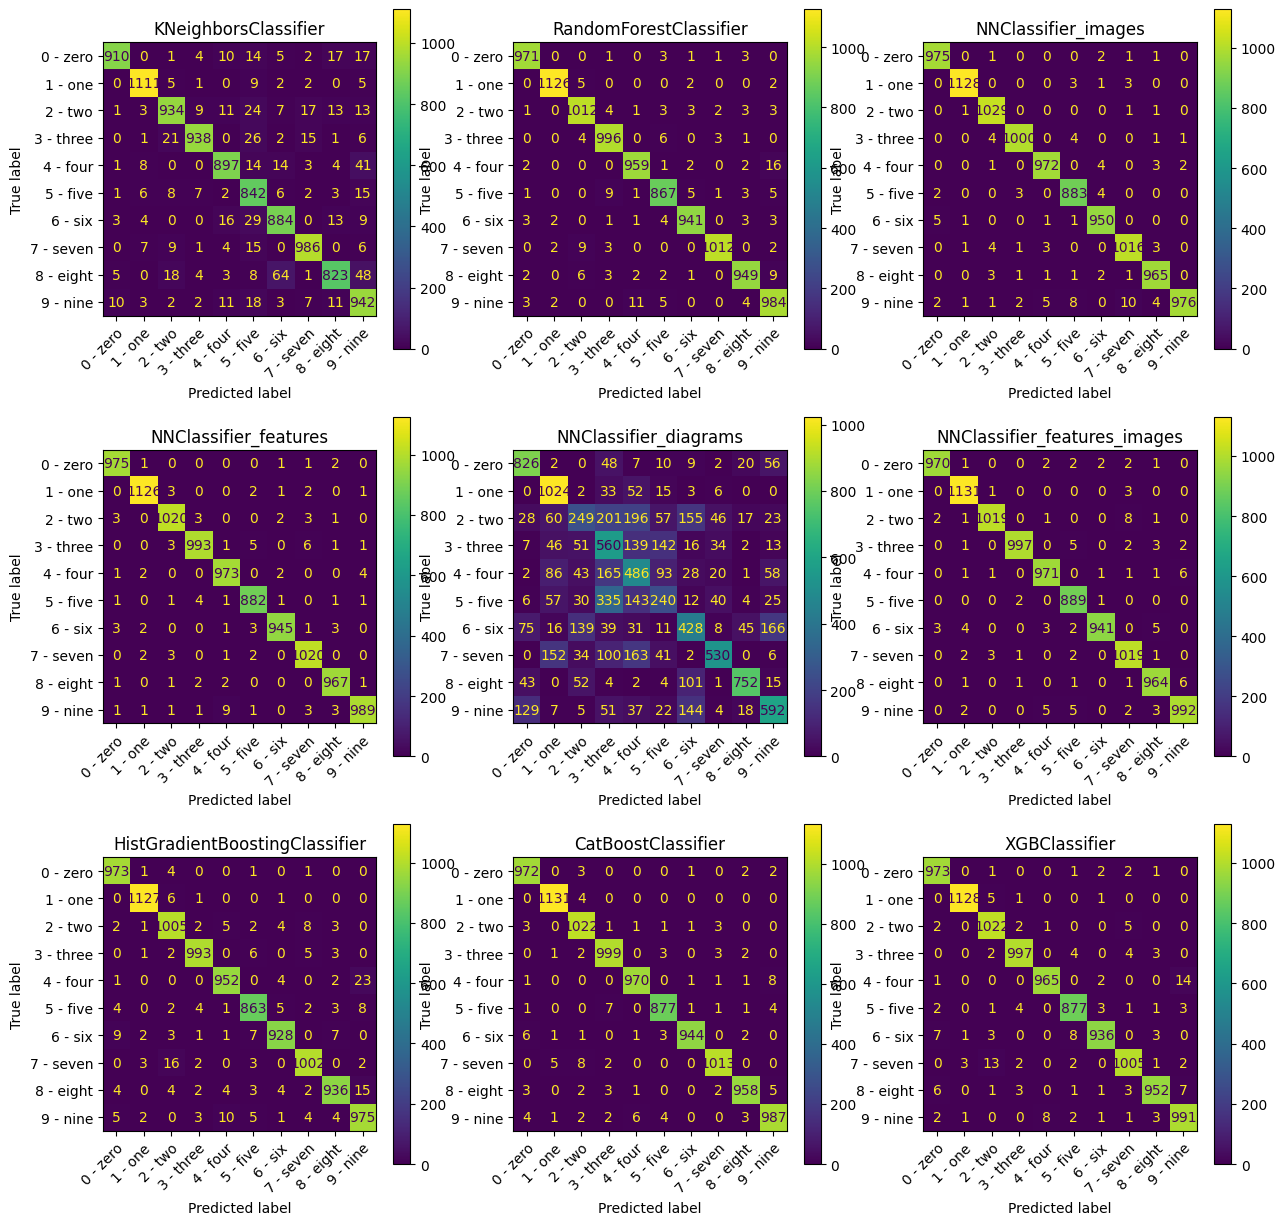

In [10]:
import cvtda.classification

cvtda.classification.classify(
    train_images, train_features, train_labels, train_diagrams,
    test_images, test_features, test_labels, test_diagrams,
    label_names = train.classes, dump_name = "12/predictions"
)